<h1 color ="color:red">GSoC'24 - GSoC CALEL Test </h1>

<h2>Understanding Criminal behaviousr of users of the Dark Web using Language and Sentiment Analysis </h2>
<h3>By - Ria Kabra</h3>
 

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\riaka\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\riaka\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\riaka\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Reading the kaggle dataset provided in the google drive

In [2]:
df = pd.read_csv(r"C:\Users\riaka\Downloads\kaggle_parsed_dataset.csv")

Upon loading the dataset, <br>
we find one target feature 'oh_label' (where <b>0 is assumed to be non-criminal/non-offensive text</b> and <b>1 is considered to br criminal/offensive text</b>)

In [3]:
df.head(2)

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."


In [4]:
df.loc[5:10]

,index,oh_label,Date,Text
5,5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,6,0,20120503012628Z,"""Yeah and where are you now?"""
7,7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,9,1,20120620160512Z,"""That you are an idiot who understands neither..."
10,10,0,20120620015140Z,"""@jdstorm dont wish him injury but it happened..."


Preprocessing functions <br>
Here I have created 4 functions<br>
1) clean -cleans, punctuations, extra characters from the text<br>
2) normalize - standardizing the text, easier for NLP analysis<br>
3) tokenize - breaks down words into tokens <br>
4) remove_stopwords - removes stopwords which do not impact the text significantly

In [5]:
import re

In [6]:
def clean(text):
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'<.~*^%&?/\>','',text)
    text = re.sub(r'[0-9]','',text)
    text=re.sub(r'[^\w\s]','',text)
    return text

Natural Langauge Toolkit

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [8]:
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riaka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riaka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def normalize(text):
    word_list=nltk.word_tokenize(text)
    lemmatized_output=" ".join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output.lower()

In [10]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riaka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

In [12]:
df['Date']=df['Date'].fillna("Unknown")

Preprocessing the dataset

In [13]:
def preprocess_text(text):
    text = clean(text)
    text = normalize(text)
    text = remove_stopwords(text)
    return text


In [14]:
df['Processed_Text']=df['Text'].apply(preprocess_text)

Results after preprocessing <br>
We can see the new 'Processed_Text' column has been added to our dataframe, and it has simple and plain words, wihtout additional characters

In [15]:
df.head()

,index,oh_label,Date,Text,Processed_Text
0,0,1,20120618192155Z,"""You fuck your dad.""",fuck dad
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ...",really dont understand pointxa seems mixing ap...
2,2,0,Unknown,"""A\\xc2\\xa0majority of Canadians can and has ...",axcxamajority canadians ha wrong againnnunless...
3,3,0,Unknown,"""listen if you dont wanna get married to a man...",listen dont wan na get married man woman dont ...
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",cxec buean xuuedng uubueddng biuecu txecnh cxf...


In [67]:
df.loc[10:15]

,index,oh_label,Date,Text,Processed_Text,Sentiment_Compound,Negative_Word_Count
10,10,0,2012-06-20 01:51:40+00:00,"""@jdstorm dont wish him injury but it happened...",jdstorm dont wish injury happened doubt injure...,-0.7668,0
11,11,0,2012-05-30 04:45:19+00:00,"""Be careful,Jimbo.OG has a fork with your name...",carefuljimboog ha fork name,0.3400,0
12,12,0,NaT,"""@tonnyb Or they just don't pay attention """,tonnyb dont pay attention,0.0762,0
13,13,0,NaT,"""Hmmm. Perhaps some who are too pig-faced to g...",hmmm perhaps pigfaced get laid therefore zero ...,0.1531,0
14,14,0,NaT,"""@barrettmarson Huh? Her income was $21,912. H...",barrettmarson huh income wa spending wa math put,0.0000,0
15,15,1,2012-06-11 09:02:07+00:00,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ...",reason u sound retarded lol damn u negro,-0.5574,0


Getting sentiment scores <br>
Sentiment Scores are a great way to analyse the statements in a given dataset <br>
Here, I have made use of SentimentIntensityAnalyser , which is a part of nltk library <br>
Values nearing <b>-1</b> are <b> strongly negative </b> <br>
Values that are <b>0</b> are <b> neutral </b><br>
Values nearing <b>1</b> are <b> strongly positive </b>


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)
    return score['compound']  
df['Sentiment_Compound'] = df['Processed_Text'].apply(analyze_sentiment_vader)


As we can observe, we got our sentiment scores under 'Sentiment_Compound' column

Understanding correaltion of text witht he sentiment compound

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Processed_Text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())

correlations = tfidf_df.corrwith(df['Sentiment_Compound'])


In [21]:
correlations

_beautifulflaws                                                                  0.002471
_chrismontana                                                                   -0.000144
_discretionary_                                                                  0.004022
_fuck_off_nigger_youre_notamerican_you_posfaggot                                 0.001424
_fuck_you_nigger_loving_faggot_go_swing_in_the_treeswith_your_own_kind_nigger    0.001424
                                                                                   ...   
zurxfcckzahlen                                                                  -0.018657
zusammenschmeixdfen                                                             -0.010744
zxa                                                                              0.001424
zz                                                                              -0.005478
zzzzzzzzzzzzzzzzzzzzz                                                           -0.006735
Length: 28

Finding out most common words used by dark web users

In [22]:
from collections import Counter

all_words = ' '.join(df['Processed_Text']).split()

word_counts = Counter(all_words)

most_common_words = word_counts.most_common(20) 


In [23]:
most_common_words

[('like', 1492),
 ('dont', 1101),
 ('wa', 949),
 ('get', 934),
 ('people', 773),
 ('one', 740),
 ('know', 721),
 ('would', 719),
 ('ha', 648),
 ('go', 627),
 ('youre', 625),
 ('u', 619),
 ('fuck', 596),
 ('think', 589),
 ('time', 500),
 ('make', 477),
 ('right', 467),
 ('say', 440),
 ('im', 433),
 ('good', 419)]

Making a wordcloud for visualiation

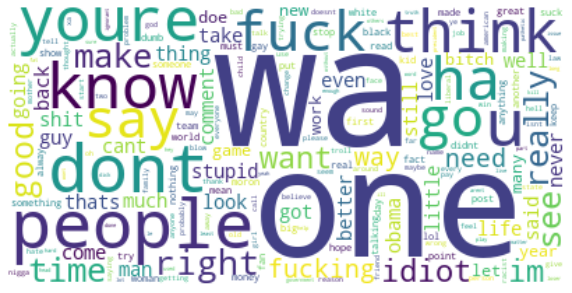

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(' '.join(df['Processed_Text']))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Most common words in barplot format

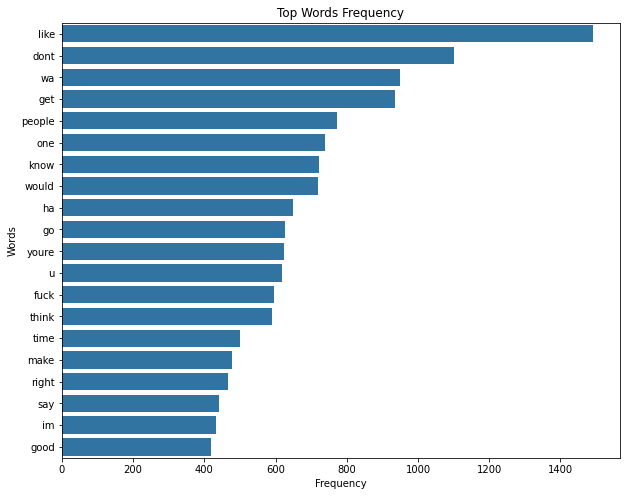

In [25]:
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10,8))
sns.barplot(x=list(frequencies),y=list(words))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words Frequency')
plt.show()


Finding out most common negative/offensive words

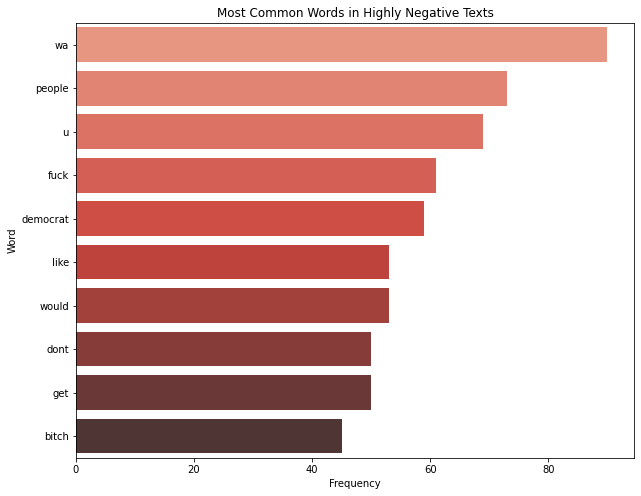

In [26]:
negative_entries = df[df['Sentiment_Compound'] < -0.95]['Processed_Text']

words_in_negative_texts = ' '.join(negative_entries).split()

from collections import Counter
word_freq = Counter(words_in_negative_texts)

df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=df_word_freq.head(10), palette='Reds_d') 
plt.title('Most Common Words in Highly Negative Texts')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Sentiment score distribution

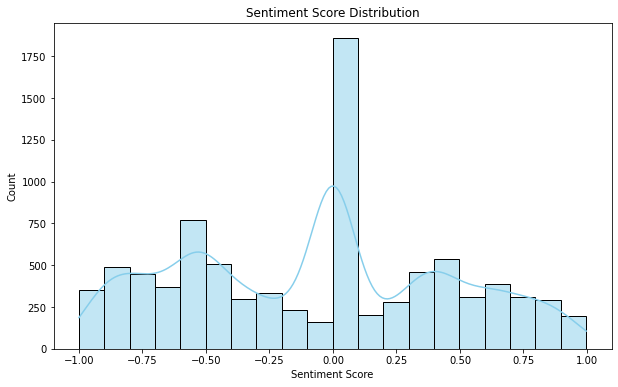

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Compound'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


Wordcloud for only negative words

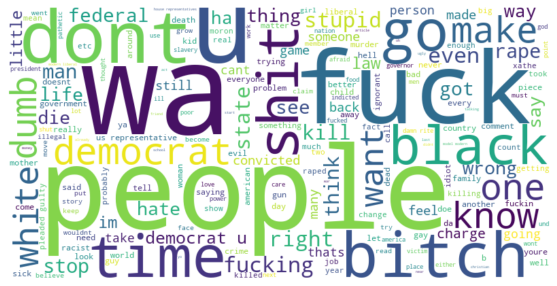

In [28]:
negative_text = ' '.join(df[df['Sentiment_Compound'] < -0.95]['Processed_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Observing our negative text

In [29]:
negative_text

'spursruss live argentina argentinians problem loud issue ill educated sure wouldnt rushing fight anyone would cowering background wife argentinean first one recognize stupidity claim muppet think fought independence uk moron lot answer simple leading colonial force would english speaking country arent werent wa spain portugal france interest commercial also worst part exterminated native spanish started actually wa newly formed argies killing native lovely eh clueless stuff wonder government get away corruption many ignorant people thats whyyou shouldnt judge standard huge amount argies see cristina drum beating president argentina using cover failing evil callous vile creature mythology made god stop killing eating baby dirty christard ignorance astounding clearly say video cleveland wa already convicted rape serving jail time hes guilty raped moron whove said ugly statement attacked veracity story determination court trying make whether cash money held liable think reasonable invite

As the negative text output is huge, extract first five texts

In [30]:
negative_texts = df[df['Sentiment_Compound'] < -0.5]

sampled_negative_texts = negative_texts.sample(n=5)  
for text in sampled_negative_texts['Processed_Text']:
    print(text, "\n")


loser 

know mother fucker stop assuming shit know know man like hypocrite son bitch 

complete idiot dare make disrespectful comment toward someone ha died funny really get making childish hateful remark 

know horrid man taking bundle something fishy karchner actually daft sound putting 

font facearial verdana sizefontspan stylecolor rgb fontfamily verdana helvetica arial sansserif fontsize px lineheight px textalign left backgroundcolor rgb ya im moron trollspandiv styletextalign left font color faceverdana helvetica arial sansserifspan stylefontsize px lineheight pxbrspanfontdivdiv styletextalign left font color faceverdana helvetica arial sansserifspan stylefontsize px lineheight pxbrspanfontdivdiv styletextalign left font color faceverdana helvetica arial sansserifspan stylefontsize px lineheight pxdo sell short idiot wellspanfontdiv 



Count of negative words per date

<Axes: title={'center': 'Daily Count of Negative Words'}, xlabel='Date'>

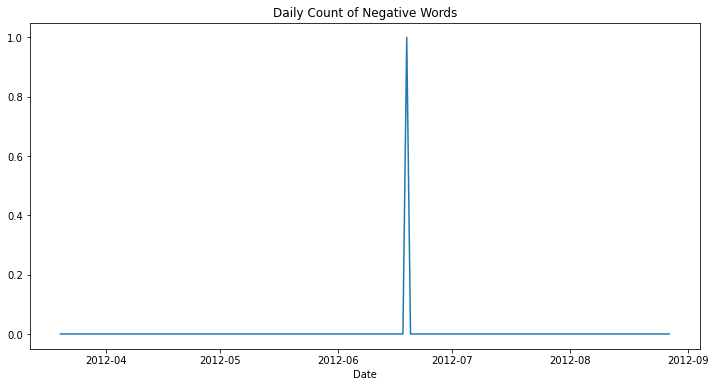

In [31]:
def count_negative_words(text):
    return sum(word in negative_texts for word in text.split())

df['Negative_Word_Count'] = df['Processed_Text'].apply(count_negative_words)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

daily_negative_counts = df.groupby(df['Date'].dt.date)['Negative_Word_Count'].sum()

daily_negative_counts.plot(figsize=(12, 6), title='Daily Count of Negative Words')


Model building <br>
Fitting the tokenizer on the text, padding for unifying length <br>
X - feature columns - 'Processed_text', 'Sentiment_Compound' <br>
y - target variable - 'oh_label'<br>
Splitting into train and test for X and Y<br>
Applying Embeddings and LSTM model <br>
Training the model

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

texts = df['Processed_Text'].astype(str)
sentiment_scores = df['Sentiment_Compound'].values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
text_data_padded = pad_sequences(sequences, maxlen=200)

X_train_texts, X_test_texts, X_train_sentiments, X_test_sentiments, y_train, y_test = train_test_split(text_data_padded, sentiment_scores, df['oh_label'], test_size=0.25, random_state=42)

text_input = Input(shape=(200,), name='text_input')
text_model = Embedding(input_dim=5000, output_dim=64, input_length=200)(text_input)
text_model = LSTM(64)(text_model)

sentiment_input = Input(shape=(1,), name='sentiment_input')
sentiment_model = Dense(32, activation='relu')(sentiment_input)

combined = concatenate([text_model, sentiment_model])

combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.5)(combined)
output = Dense(1, activation='sigmoid')(combined)

model = Model(inputs=[text_input, sentiment_input], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit([X_train_texts, X_train_sentiments], y_train, validation_data=([X_test_texts, X_test_sentiments], y_test), epochs=10, batch_size=32)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 200)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 200, 64)      320000      ['text_input[0][0]']             
                                                                                                  
 sentiment_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 lstm_4 (LSTM)                  (None, 64)           33024       ['embedding_4[0][0]']            
                                                                                            

Evaluation results

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report,roc_curve,auc

In [44]:
eval_result = model.evaluate([X_test_texts, X_test_sentiments], y_test)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

69/69 [==============================] - 2s 30ms/step - loss: 1.4611 - accuracy: 0.7441
Test Loss: 1.4610919952392578, Test Accuracy: 0.7440909147262573


Plotting test and train accuracies 
Plotting test and train loss

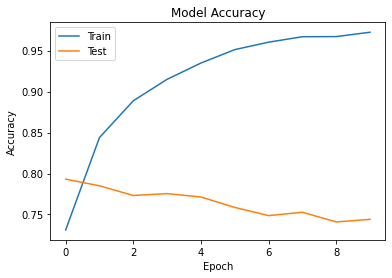

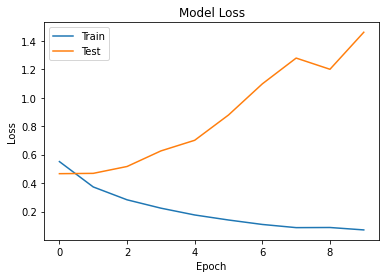

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


69/69 [==============================] - 2s 28ms/step


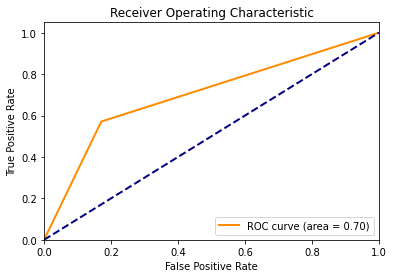

In [49]:
y_pred_prob = model.predict([X_test_texts, X_test_sentiments])
y_pred = (y_pred_prob > 0.5).astype("int32")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


69/69 [==============================] - 2s 28ms/step
               precision    recall  f1-score   support

Not-Offensive       0.80      0.83      0.81      1475
    Offensive       0.62      0.57      0.60       725

     accuracy                           0.74      2200
    macro avg       0.71      0.70      0.70      2200
 weighted avg       0.74      0.74      0.74      2200



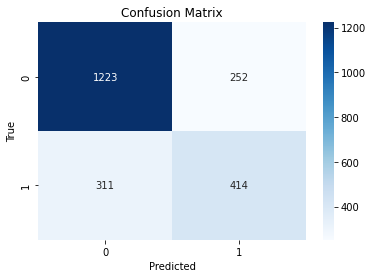

In [52]:
y_pred = model.predict([X_test_texts, X_test_sentiments])
y_pred_classes = (y_pred > 0.5).astype("int32")
print(classification_report(y_test, y_pred_classes, target_names=['Not-Offensive', 'Offensive']))


cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Checking the results of RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = rf.predict(x_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6872727272727273


In [57]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.95      0.80      1475
           1       0.60      0.15      0.24       725

    accuracy                           0.69      2200
   macro avg       0.65      0.55      0.52      2200
weighted avg       0.66      0.69      0.62      2200



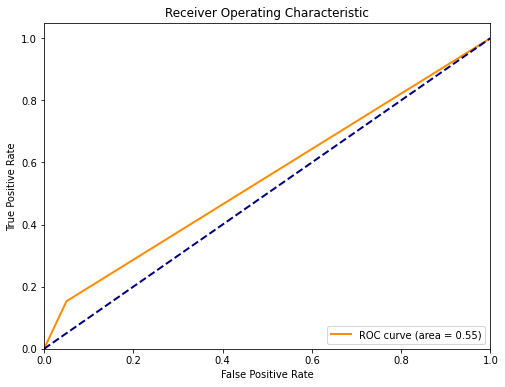

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


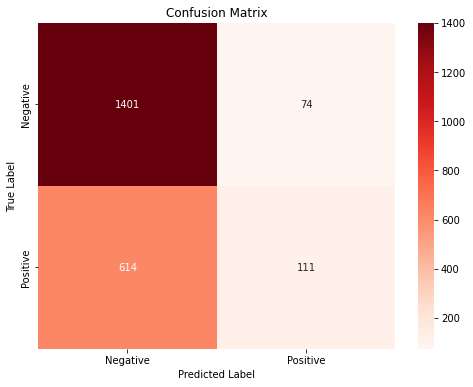

In [59]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking the results of DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dct = DecisionTreeClassifier()

In [62]:
dct.fit(x_train, y_train)
y_pred = dct.predict(x_test)

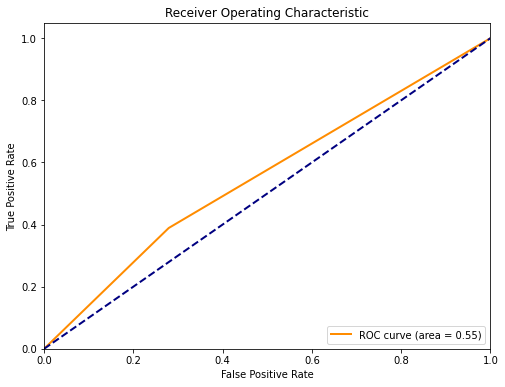

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [64]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1475
           1       0.41      0.39      0.40       725

    accuracy                           0.61      2200
   macro avg       0.56      0.55      0.56      2200
weighted avg       0.61      0.61      0.61      2200



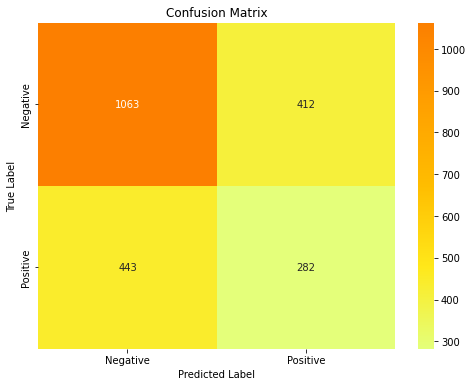

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Wistia', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.6113636363636363


<h2>Conclusion:</h2>
As we can observe, our <b> tensorflow (LSTM)</b> model gives the highest accuracy for <b>'test data' - 74.4 %</b> <br>
This model is the most accurate at labelling the processed text as criminal or non criminal <br>
<b>Random Forest</b> gives us <b>68.72 % accuracy</b><br>
<b>Decision Tree</b> gives us <b>61.13 % accuracy</b>